In [16]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

import random
np.random.seed(0)

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_of_samples = []

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.5370 - accuracy: 0.8293 - val_loss: 0.2796 - val_accuracy: 0.9210
Epoch 2/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2940 - accuracy: 0.9127 - val_loss: 0.2109 - val_accuracy: 0.9383
Epoch 3/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2560 - accuracy: 0.9231 - val_loss: 0.2115 - val_accuracy: 0.9355
Epoch 4/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2360 - accuracy: 0.9299 - val_loss: 0.1951 - val_accuracy: 0.9427
Epoch 5/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2258 - accuracy: 0.9333 - val_loss: 0.1792 - val_accuracy: 0.9488
Epoch 6/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2070 - accuracy: 0.9377 - val_loss: 0.1770 - val_accuracy: 0.9478
Epoch 7/10
54000/54000 [==============================] - 1s 17us/ste

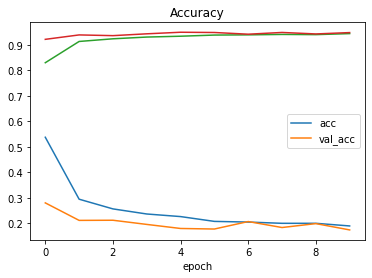

In [18]:
cols = 5
num_classes = 10


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255 
X_test = X_test/255

num_pixels = 28 * 28

X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])
